In [22]:
# TODO

# NOTE could it be a confound if smaller pain reductions are not detected?
# or if big pain reductions are quite rare (3 per one trial over 4 min, as of now)
# -> should we only do "big" pain reductions?


# FIXME plateaus can be higher than 0.75? y?

In [23]:
import logging
from pathlib import Path

if Path.cwd().stem == "notebooks":
    %cd ..
from src.log_config import configure_logging

configure_logging(
    stream_level=logging.DEBUG,
    ignore_libs=["numexpr", "numba", "bokeh", "matplotlib", "tornado"],
)

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from src.expyriment.stimulus_generator import StimulusGenerator, stimulus_extra

In [25]:
config = {
    "seeds": [786, 539, 589, 869, 431, 340, 395, 211, 909, 827, 405, 119],
    "sample_rate": 10,
    "half_cycle_num": 10,
    "period_range": [5, 20],
    "amplitude_range": [0.3, 1.0],
    "inflection_point_range": [-0.3, 0.3],
    "shorten_expected_duration": 15,
    "big_decreasing_half_cycle_num": 3,
    "big_decreasing_half_cycle_period": 20,
    "big_decreasing_half_cycle_amplitude": 0.85,
    "plateau_num": 3,
    "plateau_duration": 20,
    "plateau_percentile_range": [25, 75],
}

dummy_config = {
    "seeds": [1, 2, 3],
    "half_cycle_num": 2,
    "period_range": [2, 3],
    "big_decreasing_half_cycle_num": 0,
    "shorten_expected_duration": 0,
    "amplitude_range": [0.9, 1.0],
    "plateau_num": 0,
}

dummy_participant = {
    "temperature_baseline": 40.0,
    "temperature_range": 3,  # VAS 0 - VAS 70
}

config.update(dummy_participant)

In [31]:
stimulus = StimulusGenerator(config)
stimulus.seed
_ = stimulus_extra(stimulus, s_RoC=0.2, display_stats=False)
stimulus.duration

189.0

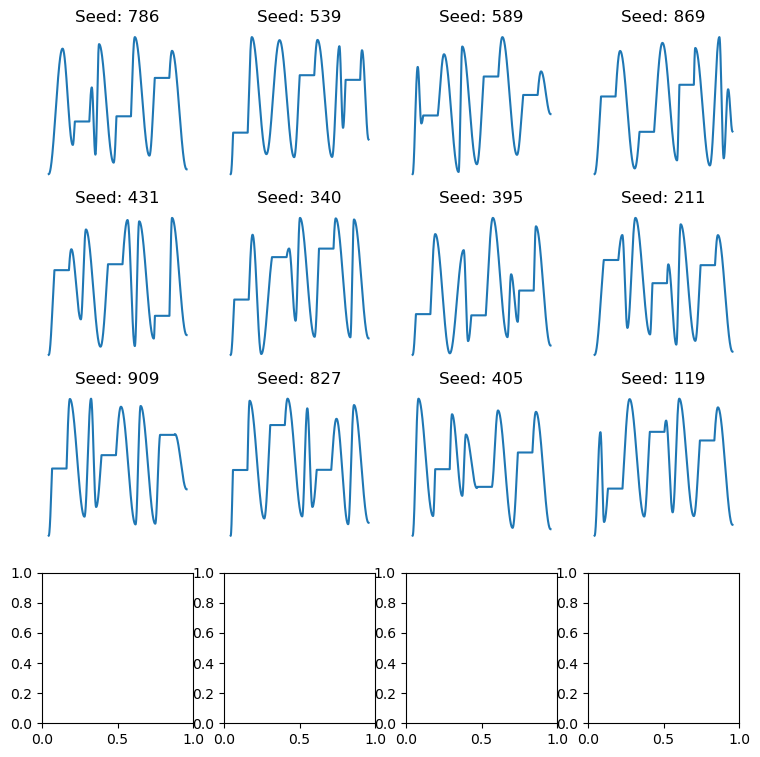

In [27]:
# TODO
# add conditional for big decreases duration (self.big_decreases_duration)
# when no duration is given for stimulus function with the same duration


rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(9, 9), dpi=100)

for ax, seed in zip(axes.flat, config["seeds"]):
    stimulus = StimulusGenerator(config)

    ax.plot(stimulus.y)
    ax.set_title(f"Seed: {seed}")
    ax.axis(False)